In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.19.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Image_Classification"
  ,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(128,128),
  batch_size=16
)

Found 12600 files belonging to 6 classes.
Using 10080 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Image_Classification"
  ,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(128,128),
  batch_size=16
)

Found 12600 files belonging to 6 classes.
Using 2520 files for validation.


In [ ]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

train_ds = train_ds.map(normalize_img)
val_ds = val_ds.map(normalize_img)

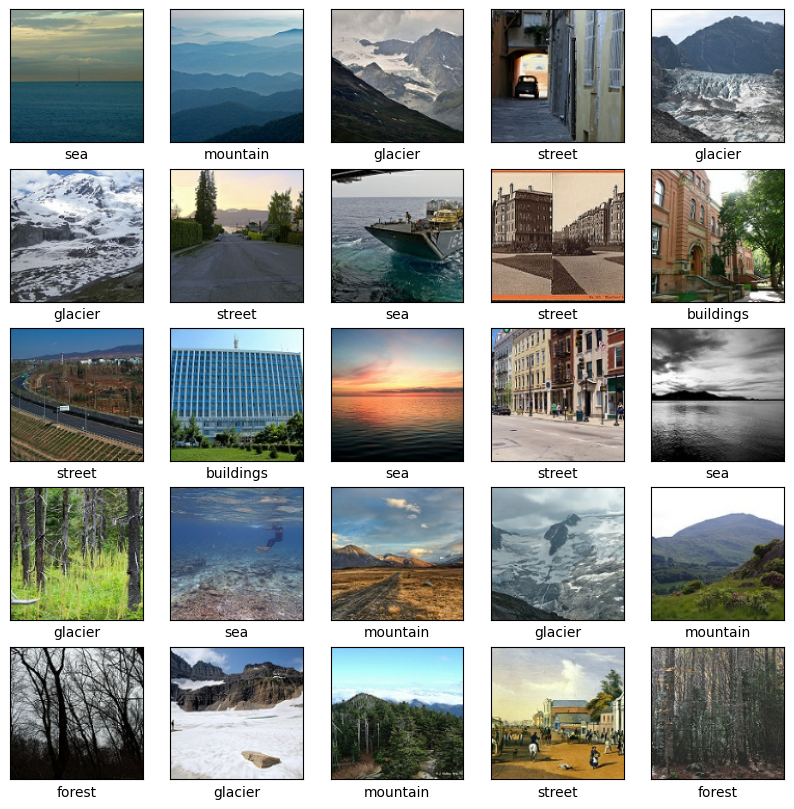

In [ ]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

plt.figure(figsize=(10,10))

# To get individual images and labels from a tf.data.Dataset, we need to iterate or take a batch
# Since batch_size is 16, we'll take a few batches to get 25 images
all_images = []
all_labels = []

for image_batch, label_batch in train_ds.take(2):
    # Convert TensorFlow tensors to NumPy arrays for matplotlib
    all_images.extend(image_batch.numpy())
    all_labels.extend(label_batch.numpy())

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(all_images[i])
    plt.xlabel(class_names[all_labels[i]])
plt.show()

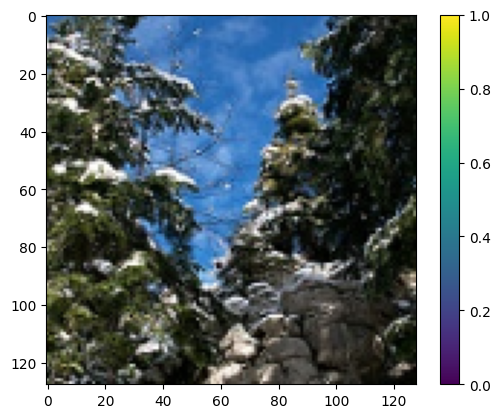

In [ ]:
plt.figure()
for image, label in train_ds.take(9):
  plt.imshow(image[0]) # Display the first image from the batch
  break
plt.colorbar()

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        73,792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,264 (590.88 KB)

 Trainable params: 151,264 (590.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,542 (2.83 MB)

 Trainable params: 741,542 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CNN = model.fit(train_ds, validation_data=val_ds,epochs=15) # fitting model

Epoch 1/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.4692 - loss: 1.2907 - val_accuracy: 0.6325 - val_loss: 0.9483
Epoch 2/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 748s 1s/step - accuracy: 0.6638 - loss: 0.8767 - val_accuracy: 0.6810 - val_loss: 0.8610
Epoch 3/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 720s 1s/step - accuracy: 0.7222 - loss: 0.7471 - val_accuracy: 0.7512 - val_loss: 0.6706
Epoch 4/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 750s 1s/step - accuracy: 0.7666 - loss: 0.6318 - val_accuracy: 0.7675 - val_loss: 0.6475
Epoch 5/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 769s 1s/step - accuracy: 0.7845 - loss: 0.5730 - val_accuracy: 0.7722 - val_loss: 0.6201
Epoch 6/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 686s 1s/step - accuracy: 0.8166 - loss: 0.5047 - val_accuracy: 0.7901 - val_loss: 0.6102
Epoch 7/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 738s 1s/step - accuracy: 0.8390 - loss: 0.4364 - val_accuracy: 0.7774 - val_loss: 0.6756
Epoch 8/15
630/630 ━━━━━━━━━━━━━━━━━━━━ 708s 1s/step - accuracy: 0.8620 - loss: 0.3900 - val_accu

In [ ]:
loss, val_acc= model.evaluate(val_ds)

print('\nValidation accuracy:', val_acc)

158/158 ━━━━━━━━━━━━━━━━━━━━ 50s 319ms/step - accuracy: 0.7745 - loss: 1.2615

Validation accuracy: 0.7865079641342163


158/158 - 50s - 317ms/step - accuracy: 0.7865 - loss: 1.2232


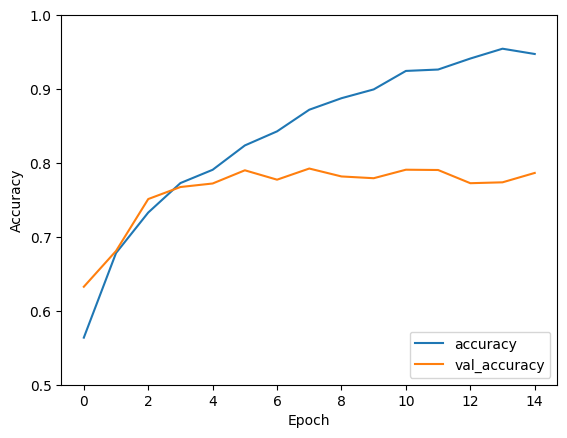

In [ ]:
plt.plot(CNN.history['accuracy'], label='accuracy')
plt.plot(CNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val_ds, verbose=2)